# **Gene Expression Prediction Using Dependent Gaussian Data**  

## **License**  
This project is released under the **GNU General Public License v3 (GPLv3)**.  
You are free to use, modify, and distribute this code under the terms of the GPLv3 license.  
For more details, see: [GNU GPL v3](https://www.gnu.org/licenses/gpl-3.0.en.html).  

## **Authors**  
- **Mina Sadat Mahmoudi**  
- **Saeed Foroutan**  
- **Seyed Abolfazl Motahari**  
- **Babak Khalaj**  
- Department of Electrical Engineering & Computer Engineering, Sharif University of Technology, Iran  

## **Conference & Publication**  
This work has been **accepted for presentation at ICASSP 2025**.  

---

## **Overview**  

This notebook presents a **real-world application** of the theoretical results from the paper:  

📄 **"Uniform Convergence of Lipschitz Functions with Dependent Gaussian Samples"**  
(*ICASSP 2025, Sharif University of Technology*)  

### **Objective**  
- Analyze **gene expression data** under **dependent Gaussian noise conditions**.  
- Train a **deep neural network model** to predict gene expression levels.  
- Evaluate how prediction errors behave under **different dependency structures** (`γ`).  

### **Methodology**  
- Utilize **real-world gene expression datasets**.  
- Apply a **deep learning model** to learn functional relationships between genes.  
- Compare generalization errors for **dependent (`γ > 0`)** and **independent (`γ = 0`)** data cases.  

This analysis explores how **dependency in biological data** affects learning and supports the **theoretical findings** of the paper regarding **uniform convergence in dependent settings**.


# **Gene Expression Prediction Using Machine Learning Models**  

This notebook investigates the relationship between **gene a5500** and **gene a11000** expression levels across **28 time points** using **machine learning models**.

---

## **1️⃣ Data Preprocessing**
- **Train-Test Split**: Data is divided into **70% training, 30% testing**.
- **Normalization**: Standardized using **MinMaxScaler** to improve training stability.

---

## **2️⃣ Regression Models for Prediction**
To predict **gene a11000 expression**, we evaluated the following models:

### **✅ Used Models (Best Performing)**
- **🔹 Simple Linear Regression** → Baseline model.
- **🔹 Neural Network (MLPRegressor)** → Two hidden layers (**10 neurons each**).
- **🔹 Random Forest Regressor** → **Best performer**, using **50 trees**.

### **❌ Redundant Models (Not Used in Final Comparison)**
- **Polynomial Regression (Degree 2-5)**
- **Decision Tree Regression**

---

## **3️⃣ Model Comparison & Results**
| **Model**                 | **Mean Squared Error (MSE)** | **R² Score** |
|--------------------------|----------------|------------|
| **Linear Regression**     | **0.1285**  | **0.3326**  |
| **Neural Network (MLP)**  | **0.1046**  | **0.5389**  |
| **Random Forest**         | **0.0593**  | **0.8048**  |

### **🔹 Best Model: Random Forest**
- **Lowest MSE (0.0593)**
- **Highest R² (0.8048)**
- Outperformed **linear regression** and **neural networks**.


---

## **4️⃣ Key Takeaways**
✅ **Random Forest is the best choice for gene expression prediction.**  
✅ **Neural networks perform well but are outclassed by Random Forest.**   


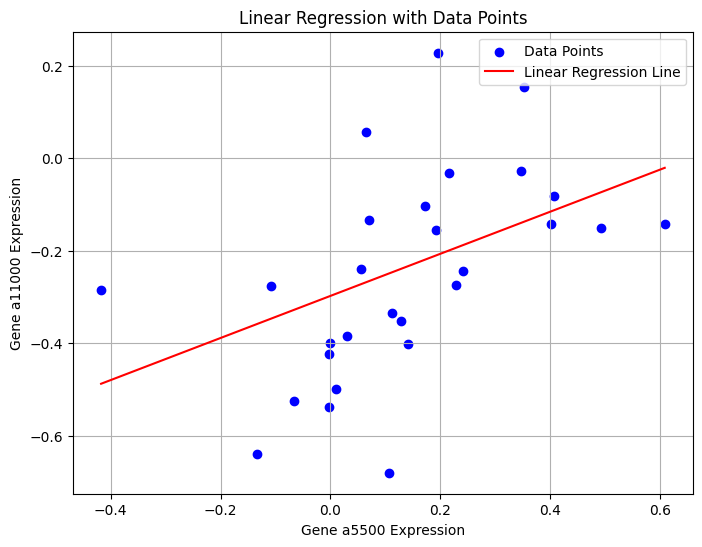

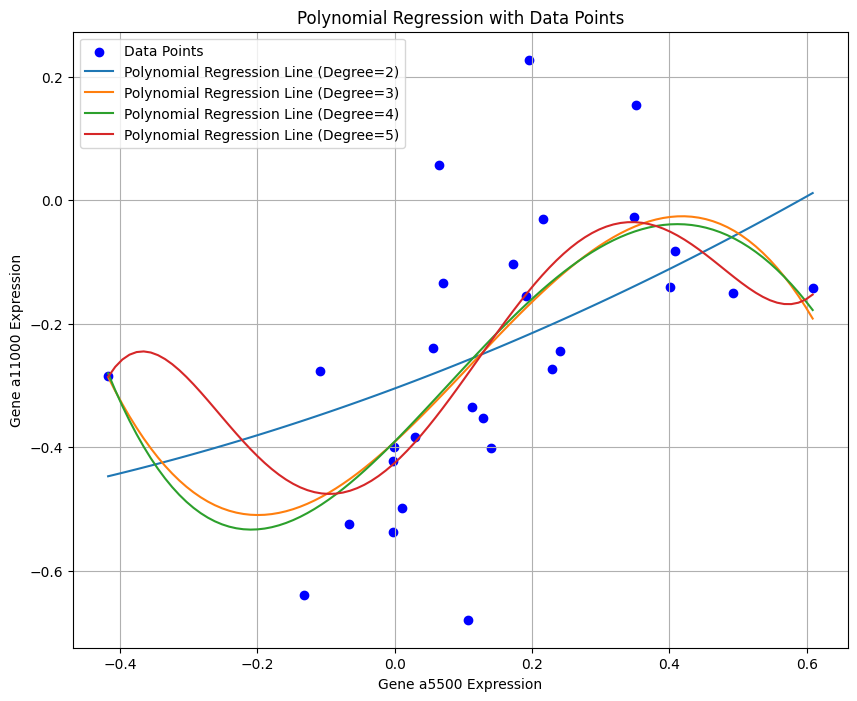

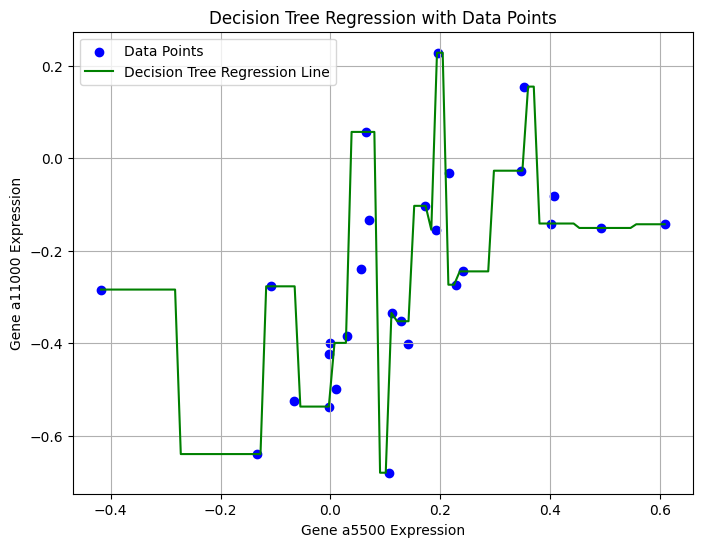

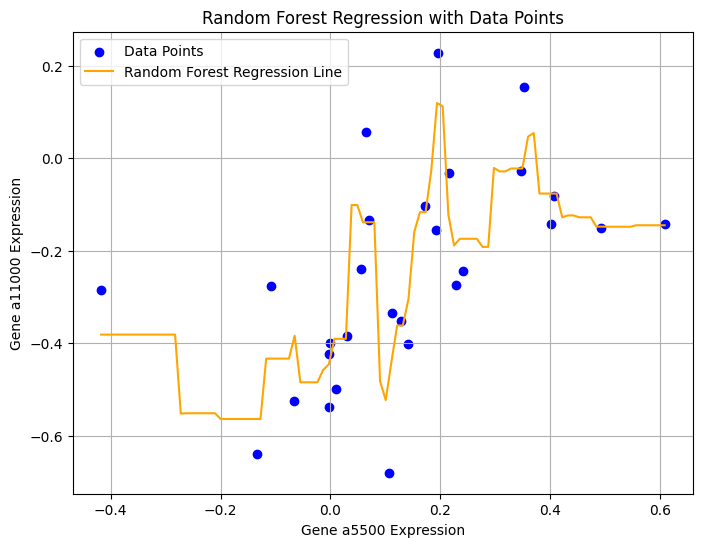

=========== MODEL COMPARISON ===========
Simple Linear Regression:
  MSE = 0.1285, R^2 = 0.3326

Polynomial Regression (Degree=2):
  MSE = 0.1268, R^2 = 0.3520

Polynomial Regression (Degree=3):
  MSE = 0.0953, R^2 = 0.6068

Polynomial Regression (Degree=4):
  MSE = 0.0928, R^2 = 0.6181

Polynomial Regression (Degree=5):
  MSE = 0.0848, R^2 = 0.6182

Neural Network (MLPRegressor):
  MSE = 0.1046, R^2 = 0.5389

Random Forest Regressor:
  MSE = 0.0593, R^2 = 0.8048

Decision Tree Regressor:
  MSE = 0.1459, R^2 = 0.0009


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# --------------------------------------------------------
# 1. DATA SETUP
# --------------------------------------------------------
# Expression values for gene a5500 across 28 time points
a5500 = np.array([
    0.011, 0.1716, 0.4923, 0.3479, 0.1919, 0.1953, 0.6088, 0.352,
    0.0704, 0.4078, 0.4013, 0.1405, 0.2157, 0.1061, -0.1329, -0.1089,
    -0.0025, 0.0556, 0.1124, 0.0645, -0.4175, -0.0664, 0.03, 0.1283,
    0.2286, -0.0029, -0.0014, 0.2412
])

# Expression values for gene a11000 across the same 28 time points
a11000 = np.array([
    -0.4982, -0.1031, -0.1509, -0.0272, -0.1547, 0.2277, -0.1429, 0.1545,
    -0.1334, -0.0827, -0.1413, -0.4022, -0.0311, -0.6797, -0.6394, -0.277,
    -0.5368, -0.2396, -0.3346, 0.0566, -0.284, -0.5243, -0.3833, -0.3524,
    -0.2735, -0.4228, -0.3992, -0.2447
])

# Reshape X because scikit-learn expects 2D arrays for features
X = a5500.reshape(-1, 1)
y = a11000

# --------------------------------------------------------
# 2. TRAIN/TEST SPLIT
# --------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# --------------------------------------------------------
# 2a. NORMALIZATION (SCALING)
# --------------------------------------------------------
# We'll standardize (mean=0, std=1) both X and y.
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Transform the test data (use the already-fitted scaler!)
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

# --------------------------------------------------------
# 3. SIMPLE LINEAR REGRESSION (on scaled data)
# --------------------------------------------------------
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train_scaled)

# Predict (scaled)
y_pred_linear_scaled = linear_model.predict(X_test_scaled)

# Denormalize predictions back to original scale
y_pred_linear = scaler_y.inverse_transform(y_pred_linear_scaled.reshape(-1, 1)).ravel()

# Evaluate using original y values
mse_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear  = r2_score(y_test, y_pred_linear)

# Plot the linear regression line with data points
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')

# Create a smooth line for the regression
def create_line(model, scaler_X, scaler_y):
    X_smooth = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_smooth_scaled = scaler_X.transform(X_smooth)
    y_smooth_scaled = model.predict(X_smooth_scaled)
    y_smooth = scaler_y.inverse_transform(y_smooth_scaled.reshape(-1, 1)).ravel()
    return X_smooth, y_smooth

X_smooth, y_smooth = create_line(linear_model, scaler_X, scaler_y)
plt.plot(X_smooth, y_smooth, color='red', label='Linear Regression Line')
plt.title('Linear Regression with Data Points')
plt.xlabel('Gene a5500 Expression')
plt.ylabel('Gene a11000 Expression')
plt.legend()
plt.grid()
plt.show()

# --------------------------------------------------------
# POLYNOMIAL REGRESSION (DEGREES 2, 3, 4, 5, on scaled data)
# --------------------------------------------------------
def plot_polynomial_regression(degree):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly_scaled = poly.fit_transform(X_train_scaled)
    X_test_poly_scaled = poly.transform(X_test_scaled)

    poly_model = LinearRegression()
    poly_model.fit(X_train_poly_scaled, y_train_scaled)

    # Predict (scaled)
    y_pred_poly_scaled = poly_model.predict(X_test_poly_scaled)

    # Denormalize
    y_pred_poly = scaler_y.inverse_transform(y_pred_poly_scaled.reshape(-1, 1)).ravel()

    # Create a smooth line for the polynomial regression
    X_smooth_poly = poly.transform(scaler_X.transform(np.linspace(X.min(), X.max(), 100).reshape(-1, 1)))
    y_smooth_poly_scaled = poly_model.predict(X_smooth_poly)
    y_smooth_poly = scaler_y.inverse_transform(y_smooth_poly_scaled.reshape(-1, 1)).ravel()

    plt.plot(np.linspace(X.min(), X.max(), 100), y_smooth_poly, label=f'Polynomial Regression Line (Degree={degree})')
    return mean_absolute_error(y_test, y_pred_poly), r2_score(y_test, y_pred_poly)

plt.figure(figsize=(10, 8))
plt.scatter(X, y, color='blue', label='Data Points')

mse_poly = []
r2_poly = []
for degree in [2, 3, 4, 5]:
    mse, r2 = plot_polynomial_regression(degree)
    mse_poly.append(mse)
    r2_poly.append(r2)

plt.title('Polynomial Regression with Data Points')
plt.xlabel('Gene a5500 Expression')
plt.ylabel('Gene a11000 Expression')
plt.legend()
plt.grid()
plt.show()

# --------------------------------------------------------
# 5. NEURAL NETWORK (MLPRegressor, on scaled data)
# --------------------------------------------------------
mlp_model = MLPRegressor(
    hidden_layer_sizes=(10, 10),
    max_iter=1000,
    random_state=42
)
mlp_model.fit(X_train_scaled, y_train_scaled)

y_pred_mlp_scaled = mlp_model.predict(X_test_scaled)
y_pred_mlp = scaler_y.inverse_transform(y_pred_mlp_scaled.reshape(-1, 1)).ravel()

mse_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp  = r2_score(y_test, y_pred_mlp)


# --------------------------------------------------------
# 6. DECISION TREE REGRESSION
# --------------------------------------------------------
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train_scaled)

# Predict (scaled)
y_pred_dt_scaled = dt_model.predict(X_test_scaled)

# Denormalize predictions back to original scale
y_pred_dt = scaler_y.inverse_transform(y_pred_dt_scaled.reshape(-1, 1)).ravel()

# Evaluate using original y values
mse_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Plot the decision tree regression predictions
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')

# Create a smooth prediction line for decision tree
X_smooth_dt = scaler_X.transform(np.linspace(X.min(), X.max(), 100).reshape(-1, 1))
y_smooth_dt_scaled = dt_model.predict(X_smooth_dt)
y_smooth_dt = scaler_y.inverse_transform(y_smooth_dt_scaled.reshape(-1, 1)).ravel()

plt.plot(np.linspace(X.min(), X.max(), 100), y_smooth_dt, color='green', label='Decision Tree Regression Line')
plt.title('Decision Tree Regression with Data Points')
plt.xlabel('Gene a5500 Expression')
plt.ylabel('Gene a11000 Expression')
plt.legend()
plt.grid()
plt.show()


# --------------------------------------------------------
# 7. RANDOM FOREST REGRESSOR (on scaled data)
# --------------------------------------------------------
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train_scaled, y_train_scaled)

y_pred_rf_scaled = rf_model.predict(X_test_scaled)
y_pred_rf = scaler_y.inverse_transform(y_pred_rf_scaled.reshape(-1, 1)).ravel()

mse_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf  = r2_score(y_test, y_pred_rf)

# Plot the random forest regression predictions
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')

# Create a smooth prediction line for random forest
X_smooth_rf = scaler_X.transform(np.linspace(X.min(), X.max(), 100).reshape(-1, 1))
y_smooth_rf_scaled = rf_model.predict(X_smooth_rf)
y_smooth_rf = scaler_y.inverse_transform(y_smooth_rf_scaled.reshape(-1, 1)).ravel()

plt.plot(np.linspace(X.min(), X.max(), 100), y_smooth_rf, color='orange', label='Random Forest Regression Line')
plt.title('Random Forest Regression with Data Points')
plt.xlabel('Gene a5500 Expression')
plt.ylabel('Gene a11000 Expression')
plt.legend()
plt.grid()
plt.show()

# --------------------------------------------------------
# 7. COMPARE RESULTS (UPDATED)
# --------------------------------------------------------
print("=========== MODEL COMPARISON ===========")
print("Simple Linear Regression:")
print(f"  MSE = {mse_linear:.4f}, R^2 = {r2_linear:.4f}")

for i, degree in enumerate([2, 3, 4, 5]):
    print(f"\nPolynomial Regression (Degree={degree}):")
    print(f"  MSE = {mse_poly[i]:.4f}, R^2 = {r2_poly[i]:.4f}")

print("\nNeural Network (MLPRegressor):")
print(f"  MSE = {mse_mlp:.4f}, R^2 = {r2_mlp:.4f}")

print("\nRandom Forest Regressor:")
print(f"  MSE = {mse_rf:.4f}, R^2 = {r2_rf:.4f}")

print("\nDecision Tree Regressor:")
print(f"  MSE = {mse_dt:.4f}, R^2 = {r2_dt:.4f}")
print("========================================")


In [ ]:
len(y_test)

9